In [1]:
# importing all the essential libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import multiprocessing as mp
import math
from sklearn.preprocessing import MinMaxScaler
import random

In [2]:
# reading the final dataset
data=pd.read_csv('merged.csv',low_memory=False)

In [3]:
# columns that are needed to be converted


column_type=['Pressure_dbar',
             'Temperature_Celcius',
             'salinity_pss',
             'Sigma_theta_kg_m_pow_minus_3',
             'depth_m',
             'oxygen_mu_molkg_pow_minus_1',
             'oxygen_saturation_percentage',
             'nitrate_mu_mol_kg_pow_minus_1',
             'chl_a_mg_m_pow_minus_3',
             'b_bp700_m_pow_minus_1',
             'POC_milli_mol_m_pow_minus_3',
             'pH_insitu_total','pH_25C_total',
             'TALK_micro_mol_kg_pow_minus_1',
             'DIC_micro_mol_kg_pow_minus_1',
             'pCO2_micro_atm','b_bp532_m_pow_minus_1',
             'CDOM_ppb']

In [4]:
# action for column conversion from object to float

for col in column_type:
    data[col]=data[col].astype(float)

In [5]:
# droppoing mbariID column as it contains only 1 value

data.drop(['mbariID'],axis=1,inplace=True)

In [6]:
data.drop(['Type',
           'pressure_QF',
           'temperature_QF',
           'b_bp532_m_pow_minus_1',
           'b_bp532_QF',
          'oxygen_saturation_percentage'],axis=1,inplace=True)

In [7]:
# columns which are having invalid values mixed with valid values

col_list= ["chl_a_mg_m_pow_minus_3" ,
    "b_bp700_m_pow_minus_1" , 
    "POC_milli_mol_m_pow_minus_3" , 
    "pH_insitu_total" , "pH_25C_total" , 
    "TALK_micro_mol_kg_pow_minus_1" , 
    "DIC_micro_mol_kg_pow_minus_1" , 
    "pCO2_micro_atm" , 
    "CDOM_ppb",
    "oxygen_mu_molkg_pow_minus_1",
    "nitrate_mu_mol_kg_pow_minus_1"]
# print(len(col_list))

In [8]:
# val dataframe is the one that would be worked on, 

val=data

In [9]:
# nitrate_mu_mol_kg_pow_minus_1 > 0 only available


val=val[val['nitrate_mu_mol_kg_pow_minus_1']>0]

In [10]:
# dropping all the rows that are having invalid values for some features

for i in col_list:
    val=val[val[i]!=-10000000000.0]
print("after dropping rows, the shape of new dataframe: ",val.shape)
# print("shape of previous dataframe: ",data.shape)
# print("percentage of dropped data: ",((data.shape[0]-val.shape[0])/data.shape[0])*100,"%")

after dropping rows, the shape of new dataframe:  (13631, 38)


In [11]:
col_list=['FloatID', 
          'Station', 
          'longitude_degrees_east',
          'latitude_degrees_north', 
          'latitude_QF', 
          'Pressure_dbar',
          'Temperature_Celcius', 
          'salinity_pss', 
          'salinity_QF',
          'Sigma_theta_kg_m_pow_minus_3', 
          'sigma_theta_QF', 
          'depth_m', 
          'depth_QF',
          'oxygen_mu_molkg_pow_minus_1', 
          'oxygen_QF', 
          'oxygen_saturation_QF',
          'nitrate_mu_mol_kg_pow_minus_1', 
          'nitrate_QF', 
          'chl_a_mg_m_pow_minus_3',
          'chl_a_QF', 
          'b_bp700_m_pow_minus_1', 
          'b_bp700_QF',
          'POC_milli_mol_m_pow_minus_3', 
          'POC_QF', 
          'pH_insitu_total',
          'pH_insitu_QF', 
          'pH_25C_total', 
          'pH_25C_QF',
          'TALK_micro_mol_kg_pow_minus_1', 
          'TALK_QF',
          'DIC_micro_mol_kg_pow_minus_1', 
          'DIC_QF', 
          'pCO2_micro_atm', 
          'pCO2_QF',
          'CDOM_ppb', 
          'CDOM_QF']

In [12]:
# dropping some columns again, but don't know why!!!
val.drop(['region','latitude_QF','salinity_QF','sigma_theta_QF','depth_QF','time','nitrate_QF','chl_a_QF',
         'b_bp700_QF','POC_QF','pH_insitu_QF','pH_25C_QF','TALK_QF','DIC_QF','pCO2_QF','CDOM_QF','oxygen_QF',
         'oxygen_saturation_QF'],axis=1,inplace=True)

In [13]:
# pearson correlation coefficient

cor=val.corr(method="pearson")

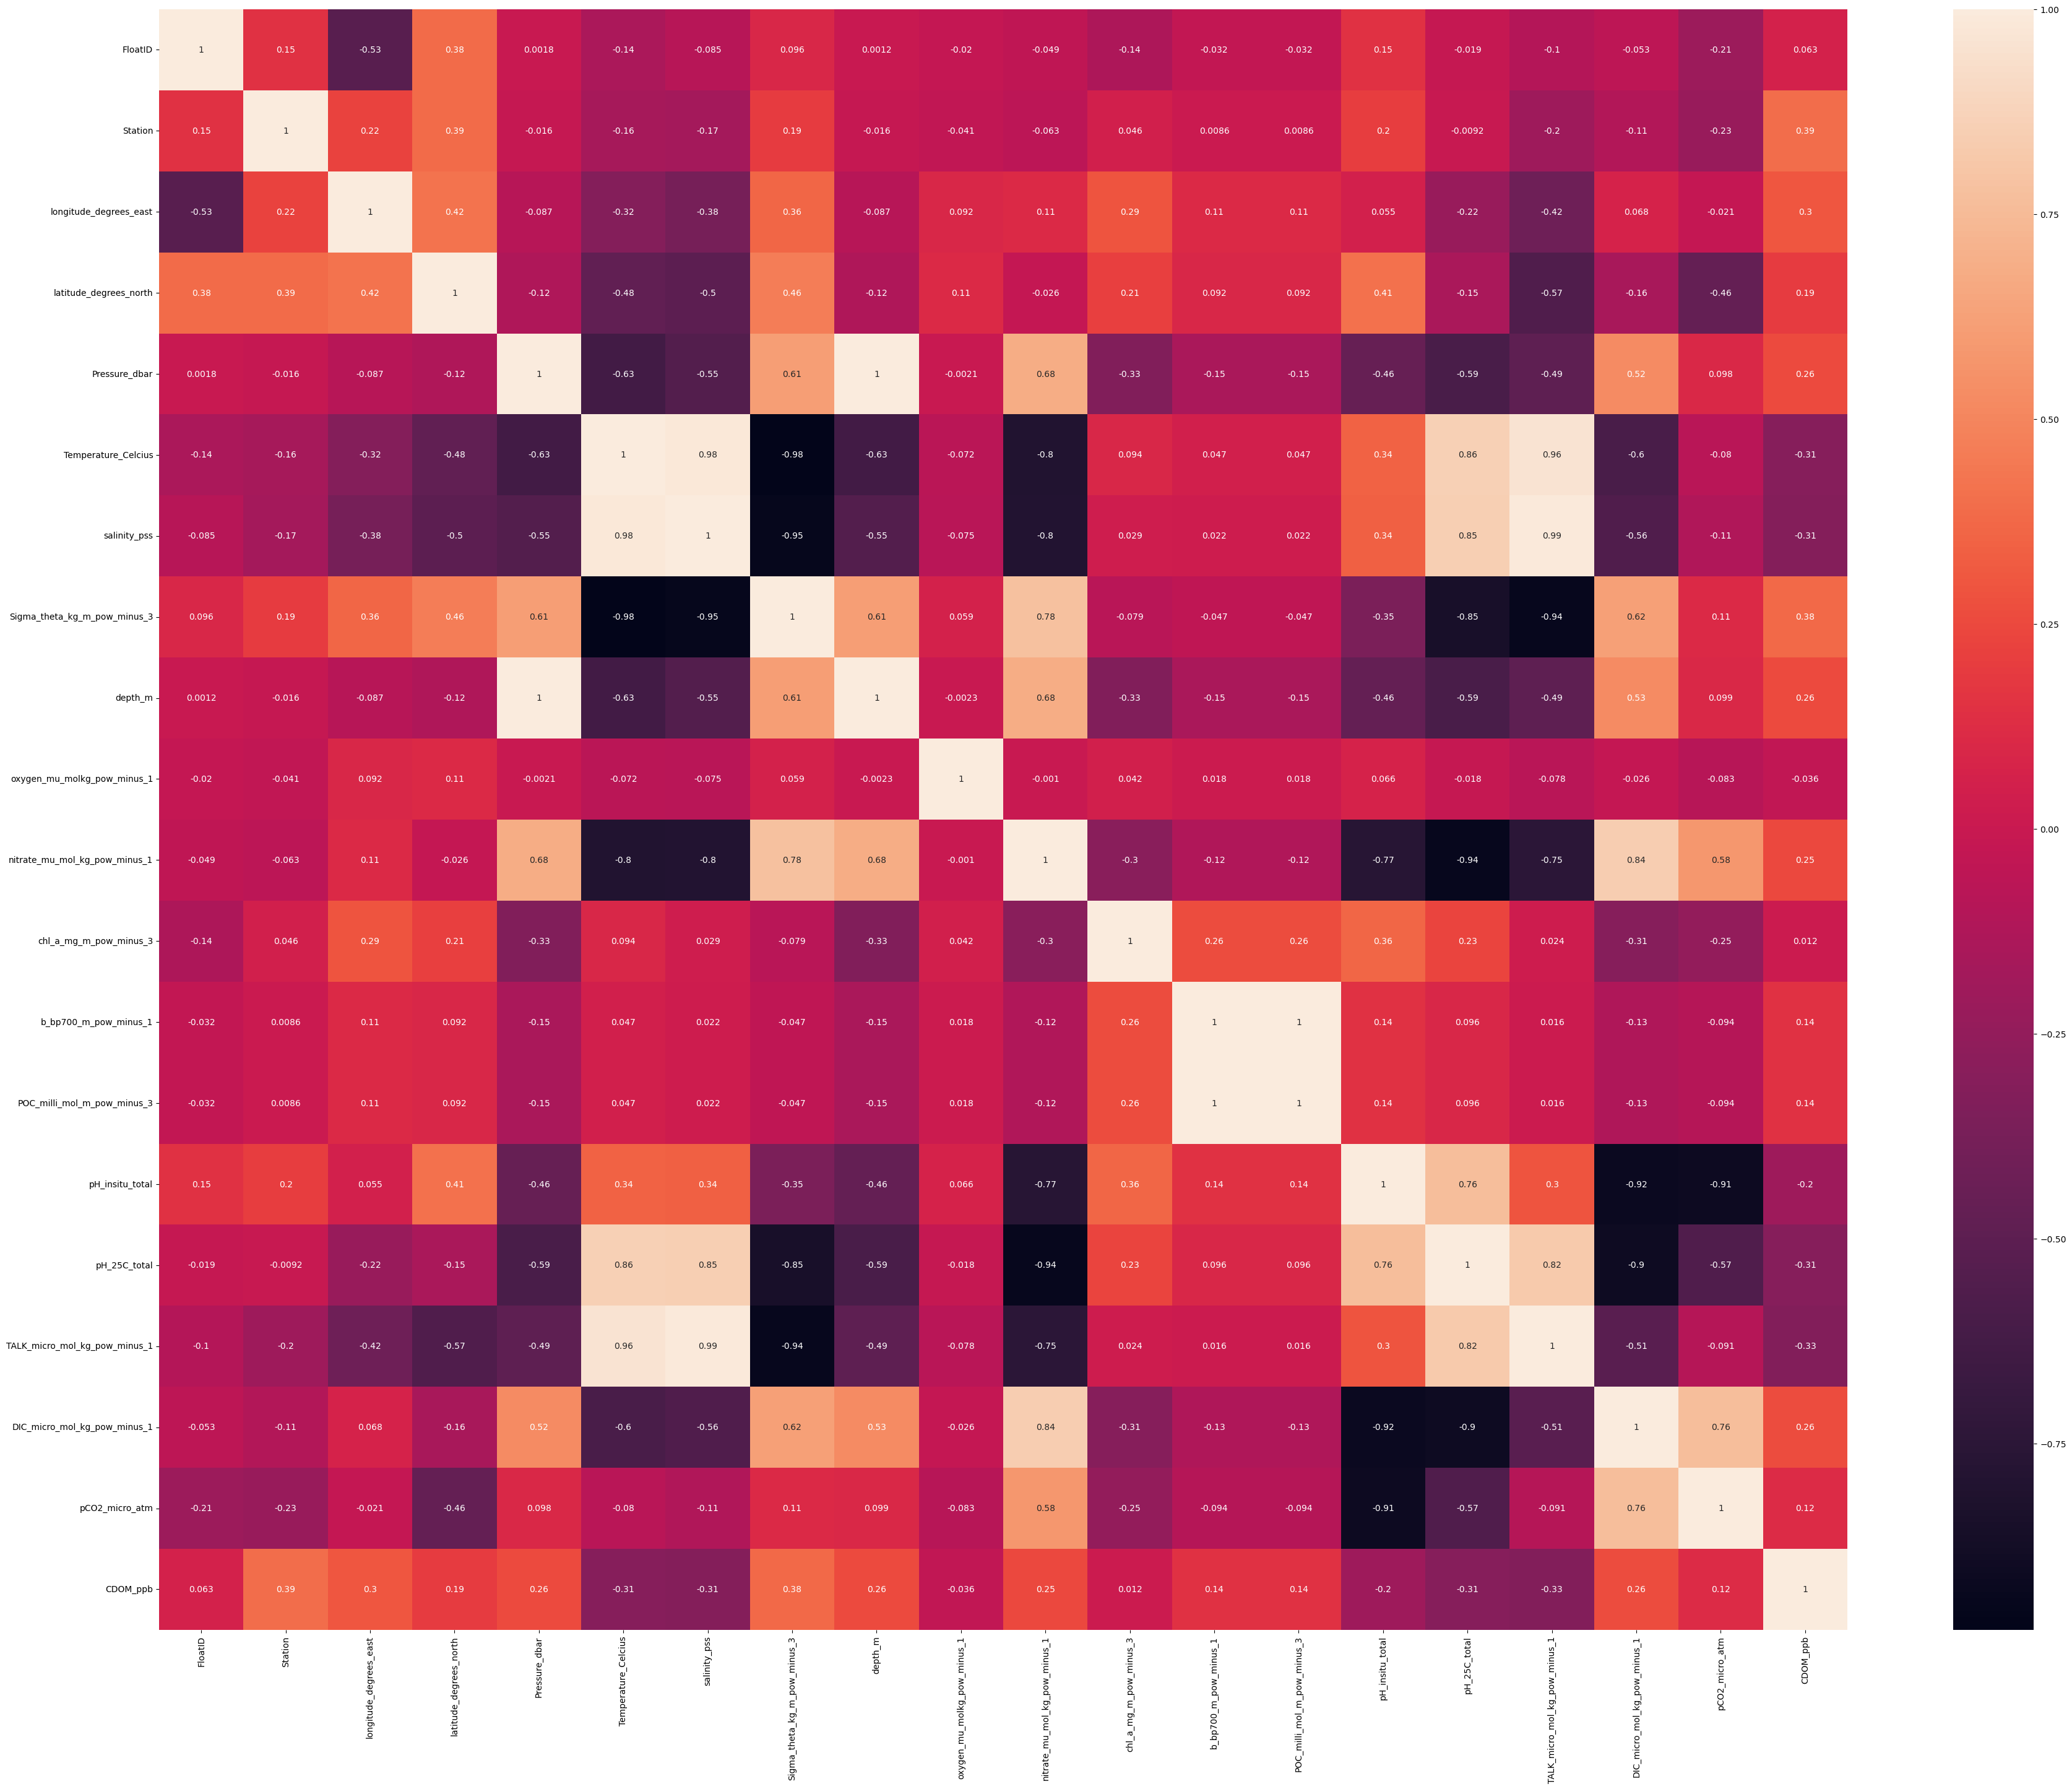

In [14]:
fig, ax = plt.subplots(figsize = (44, 34))
sns.heatmap(cor,annot=True)
plt.show()

In [41]:
# sum of all the correlation co efficient for all columns
# low correlation coefficient has been considered, please take it into account in future

div=val.shape[1]-1
cor_list=[]
cor_col=cor.columns
for i in cor_col:
    sm=0
    for j in cor[i]:
        sm+=abs(j)
    #print("abs value for ",i," is ",sm)
    cor_list.append((i,(sm/div)*100))
cor_list.sort(key=lambda i:i[1], reverse= True)

for i in cor_list:
    print(i)

('pH_25C_total', 52.09728825611904)
('nitrate_mu_mol_kg_pow_minus_1', 50.735367864199546)
('Sigma_theta_kg_m_pow_minus_3', 50.17402386517139)
('Temperature_Celcius', 50.1271119992348)
('salinity_pss', 48.74706960048199)
('TALK_micro_mol_kg_pow_minus_1', 47.818979266293745)
('DIC_micro_mol_kg_pow_minus_1', 47.437384169892546)
('pH_insitu_total', 43.90757766936304)
('depth_m', 40.789291352013194)
('Pressure_dbar', 40.75759489133282)
('latitude_degrees_north', 33.309290312684844)
('pCO2_micro_atm', 31.360778367843988)
('CDOM_ppb', 27.654531634856873)
('longitude_degrees_east', 27.28553098597369)
('chl_a_mg_m_pow_minus_3', 24.161402225221185)
('POC_milli_mol_m_pow_minus_3', 19.330288508240177)
('b_bp700_m_pow_minus_1', 19.329660373755193)
('Station', 19.053397837277988)
('FloatID', 17.031974396664886)
('oxygen_mu_molkg_pow_minus_1', 9.779616642697068)


In [79]:
# def gaussianKernel(U,V,sigma):
#         return np.exp((-1/(2*(sigma*sigma)))*(np.sum(np.power((U-V),2))))
# def gram(U,V,sigma=0.1):
#     G = np.zeros((U.shape[0], V.shape[0]))
#     for i in range(0,U.shape[0]):
#         for j in range(0,V.shape[0]):
#             G[i][j] = gaussianKernel(U[i],V[j],sigma)
#     return G


# def RBF(x_train1,y_train1,x_test1,y_test):


#     RBF_regressor=SVR(kernel = "precomputed")
#     y_train1=y_train1.ravel()
#     RBF_regressor.fit(gram(x_train1,x_train1,0.2),y_train1)
#     y_pred=RBF_regressor.predict(gram(x_test1,x_train1))
#     y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
#     y_pred=sc_y.inverse_transform(y_pred)


#     # evaluating the model
#     # mse
#     print("MSE:", mean_squared_error(y_test, y_pred))
#     # RMSE
#     print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
#     # r2 score
#     r2 = r2_score(y_test,y_pred)
#     print("r2 value: ",r2)
#     # adjusted r2 score
#     n=y_test.shape[0]       # n=number of observations
#     k=x_train.shape[1]-1      # k=number of predictor variables
#     adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
#     print("adjusted r2 value: ",adj_r2_score)

In [ ]:
# train,test = train_test_split(val,
#                               random_state=random.randint(0,10000000),
#                               test_size=0.1,
#                             train_size=0.45)
    
# # predicting ph

# # training data
# x_train=train.drop(['pH_25C_total'],axis=1)
# y_train=train['pH_25C_total']
# #test data
# x_test=test.drop(['pH_25C_total'],axis=1)
# y_test=test['pH_25C_total']


# # converting target column on both test and training set into frame

# y_test=y_test.to_frame()
# y_train=y_train.to_frame()

# # initiating the scaling instances

# sc_x=StandardScaler()
# sc_y=StandardScaler()

# # fitting the training and testing data to the scaling instances
# x_train1=sc_x.fit_transform(x_train)
# y_train1=sc_y.fit_transform(y_train)
# x_test1=sc_x.fit_transform(x_test)

# RBF(x_train1,y_train1,x_test1,y_test)


In [24]:
## custom linear kernel

def Kernel(U,V,sigma):
    return sigma*np.sum(U)*np.sum(V)
def Lineargram(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel(U[i],V[j],sigma)
    return G


def LinearRegressor(x_train1,y_train1,x_test1,y_test,sigma):
    Linear_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    Linear_regressor.fit(Lineargram(x_train1,x_train1,sigma),y_train1)
    y_pred=Linear_regressor.predict(Lineargram(x_test1,x_train1,sigma))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [31]:
cnt=0
it=1
r2_list=[]
adj_r2_score_list=[]
mse_list=[]
rmse_list=[]

while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.01,
                                train_size=0.1)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=LinearRegressor(x_train1,y_train1,x_test1,y_test,0.6)
    if(val1[0]!=-1):
        mse_list.append(val1[0])
        rmse_list.append(val1[1])
        r2_list.append(val1[2])
        adj_r2_score_list.append(val1[3])
        print(f'adjusted r-squared: {val1[3]}')
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations
2 -th iterations
3 -th iterations
4 -th iterations
5 -th iterations


In [23]:
for i in range(len(r2_list)):
    print(mse_list[i],rmse_list[i],r2_list[i],adj_r2_score_list[i],)

0.015377298945767628 0.12400523757393325 0.19324177256409192 0.06222975272407261
0.015143217224580875 0.123057780024592 0.15787598918104462 0.021120807936940822
0.015265368122623118 0.12355309839345639 0.18354227531739975 0.05095512344586639
0.014996381031596989 0.1224597118712803 0.15928445349631548 0.022757997226486415
0.014347773563839669 0.11978219218164138 0.20631856483574773 0.07743012664668114
0.01494877929512352 0.1222652006710148 0.14589165484871713 0.007190299653209609
0.014807807419070163 0.1216873346699243 0.15410346466180225 0.016735651230812776
0.01602051140743991 0.12657215889539022 0.17187983738310975 0.037398785334213036
0.01584914377940096 0.12589338258781102 0.16149451837950812 0.02532696153515468
0.013074961467835305 0.11434579777077646 0.19048356224987784 0.059023627914387866


In [41]:
# linear kernel based SVR called, and the model fitted to the training data
# pre-built function
# we may need it

regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)


# predicting based on test data


# prediction function
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 9.310903626645065e-05
RMSE: 0.009649302372008593
r2 value:  0.9951698469086216
adjusted r2 value:  0.9937438017102147


In [ ]:
# degree 2 is better, and by default is 3
# testing on poly kernel, degree parameter for ph25C

for i in [2,3,4]:
    
    print("degree is: ",i)
    regressor=SVR(kernel='poly',degree=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

In [ ]:
# lesser coef0 is better, and 0.4 is good!!!!
## testing on poly, coef parameter for ph25C

for i in [0.3,0.4]:
    
    print("coef0 is: ",i)
    regressor=SVR(kernel='poly',coef0=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

In [ ]:
## final params for poly kernel for ph25C

regressor=SVR(kernel='poly',degree=2,coef0=0.4)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
# mse
print("MSE:", mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)


# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

In [ ]:
## better prediction for C=4
## it's on RBF, C params


for i in [1,3,4,5]:
    print("C is: ",i)
    regressor=SVR(C=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

In [ ]:
## epsilon = 0.001 produces better result
# on RBF kernel, epsilon params


for i in [0.001,0.0009,0.0005,0.002]:    
    print("epsilon is: ",i)
    regressor=SVR(epsilon=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

In [ ]:
## final 
## default is RBF


regressor=SVR(epsilon=0.001, C=4)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

In [30]:
## a*log(|b*x^c|)
## not a good kernel
# modify it, causing overflow, maybe

def LogarithmicCell(U,V,a,b,c,base=math.e):
    return a*(math.log(abs(b*pow(np.dot(U,V.T),c)),base))



def Logarithmic(U,V,a,b,c,base=math.e):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = LogarithmicCell(U[i],V[j],a,b,c,base)
    return G


def LogarithmicKernel(x_train1,y_train1,x_test1,y_test,a,b,c,base=math.e):
    
    LogarithmicKernelRegressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    LogarithmicKernelRegressor.fit(Logarithmic(x_train1,x_train1,a,b,c,base),y_train1)
    y_pred=LogarithmicKernelRegressor.predict(Logarithmic(x_test1,x_train1,a,b,c,base))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)

    # evaluating the model
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])


In [ ]:
cnt=0
it=1
r2_logarithmic_list=[]
adj_r2_logarithmic_list=[]
mse_logarithmic_list=[]
rmse_logarithmic_list=[]
a=float(input("paramter for a: "))
b=float(input("paramter for b: "))
c=float(input("paramter for c: "))
# base=float(input("paramter for base: "))
base=math.e
while(cnt<1):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.07,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=LogarithmicKernel(x_train1,y_train1,x_test1,y_test,a,b,c,base=2.71828)
    if(val1[0]!=-1):
        mse_logarithmic_list.append(val1[0])
        rmse_logarithmic_list.append(val1[1])
        r2_logarithmic_list.append(val1[2])
        adj_r2_logarithmic_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

In [78]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return -1

In [ ]:
mat=np.array([list((val.corr()['pH_25C_total']).drop('pH_25C_total').values)]).T
cnt=0
it=1
r2_RBF_matmul_list=[]
adj_r2_RBF_matmul_score_list=[]
mse_RBF_matmul_list=[]
rmse_RBF_matmul_list=[]
sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.07,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
    if(val1[0]!=-1):
        mse_RBF_matmul_list.append(val1[0])
        rmse_RBF_matmul_list.append(val1[1])
        r2_RBF_matmul_list.append(val1[2])
        adj_r2_RBF_matmul_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

In [ ]:
# ## sigmoid kernel with adding coefficient
# ## i don't think we would need it

# def Kernel_tanh(U,V,sigma):
#     return np.tanh(sigma*np.dot(U,V))
# def tanh_kernel(U,V,sigma=0.1):
#     G = np.zeros((U.shape[0], V.shape[0]))
#     for i in range(0,U.shape[0]):
#         for j in range(0,V.shape[0]):
#             G[i][j] = Kernel_tanh(U[i],V[j],sigma)
#     return G

# tanh_regressor=SVR(kernel = "precomputed")
# y_train1=y_train1.ravel()
# tanh_regressor.fit(tanh_kernel(x_train1,x_train1,0.2),y_train1)
# y_pred=tanh_regressor.predict(tanh_kernel(x_test1,x_train1))
# y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
# y_pred=sc_y.inverse_transform(y_pred)

# # evaluating the model
# # mse
# print("MSE:", mean_squared_error(y_test, y_pred))
# # RMSE
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# # r2 score
# r2 = r2_score(y_test,y_pred)
# print("r2 value: ",r2)
# # adjusted r2 score
# n=y_test.shape[0]
# k=x_train.shape[1]
# adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
# print("adjusted r2 value: ",adj_r2_score)

In [17]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh

def Kernel_sinh(U,V,sigma,C):
    return math.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,y_test,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    # sigma=float(input("paramter for sigma: "))
    # C=float(input("paramter for C: "))
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)

    # evaluating the model
    # mse
    # print("y_test: ",y_test,"y_pred",y_pred)
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return -1

In [ ]:
cnt=0
it=1
r2_custom_sinh_list=[]
adj_r2_custom_sinh_score_list=[]
mse_custom_sinh_list=[]
rmse_custom_sinh_list=[]
sigma=float(input("paramter for sigma: "))
C=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.1,
                                train_size=0.6)
        
    # predicting ph

    # training data
    x_train=train.drop(['pH_25C_total'],axis=1)
    y_train=train['pH_25C_total']
    #test data
    x_test=test.drop(['pH_25C_total'],axis=1)
    y_test=test['pH_25C_total']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=sinh(x_train1,y_train1,x_test1,y_test,sigma,C)
    if(val1[0]!=-1):
        mse_custom_sinh_list.append(val1[0])
        rmse_custom_sinh_list.append(val1[1])
        r2_custom_sinh_list.append(val1[2])
        adj_r2_custom_sinh_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

In [ ]:
for i in range(len(mse_custom_sinh_list)):
    print("for ",i,"-th iteration: ")
    print("mse: ",mse_custom_sinh_list[i])
    print("rmse: ",rmse_custom_sinh_list[i])
    print("r2: ",r2_custom_sinh_list[i])
    print("adjusted r2: ",adj_r2_custom_sinh_score_list[i])

In [24]:
# # sinh kernel with sigma multiplied and C added afterwards
# # it's a custom kernel based on sinh
# # it's good, very good

# def cell(U,V,c,d,z):
#     x=np.dot(U,V)
#     return z*(math.sin(c*x))
# def trigono_kernel(U,V,c,d,z):
#     G = np.zeros((U.shape[0], V.shape[0]))
#     for i in range(0,U.shape[0]):
#         for j in range(0,V.shape[0]):
#             G[i][j] = cell(U[i],V[j],c,d,z)
#     return G


# def trigono_operation(x_train1,y_train1,x_test1,y_test,c,d,z):
    
#     trigono_regressor=SVR(kernel = "precomputed")
#     y_train1=y_train1.ravel()
#     # sigma=float(input("paramter for sigma: "))
#     # C=float(input("paramter for C: "))
#     trigono_regressor.fit(trigono_kernel(x_train1,x_train1,c,d,z),y_train1)
#     y_pred=trigono_regressor.predict(trigono_kernel(x_test1,x_train1,c,d,z))
#     y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
#     y_pred=sc_y.inverse_transform(y_pred)

#     # evaluating the model
#     # mse
#     # print("y_test: ",y_test,"y_pred",y_pred)
#     print("MSE:", mean_squared_error(y_test, y_pred))
#     # RMSE
#     print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
#     # r2 score
#     r2 = r2_score(y_test,y_pred)
#     print("r2 value: ",r2)
#     # adjusted r2 score
#     n=y_test.shape[0]
#     k=x_train.shape[1]
#     adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
#     print("adjusted r2 value: ",adj_r2_score)
#     if(r2>0 and adj_r2_score>0):
#         return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
#     else:
#         return -1

In [29]:
# train,test = train_test_split(val,
#                             random_state=random.randint(0,10000000),
#                             test_size=0.05,
#                             train_size=0.3)
    
# # predicting ph

# # training data
# x_train=train.drop(['pH_25C_total'],axis=1)
# y_train=train['pH_25C_total']
# #test data
# x_test=test.drop(['pH_25C_total'],axis=1)
# y_test=test['pH_25C_total']


# # converting target column on both test and training set into frame

# y_test=y_test.to_frame()
# y_train=y_train.to_frame()

# # initiating the scaling instances

# sc_x=StandardScaler()
# sc_y=StandardScaler()

# # fitting the training and testing data to the scaling instances
# x_train1=sc_x.fit_transform(x_train)
# y_train1=sc_y.fit_transform(y_train)
# x_test1=sc_x.fit_transform(x_test)

# a=trigono_operation(x_train1,y_train1,x_test1,y_test,1,1,2)

MSE: 15774.879662209954
RMSE: 125.59808781271296
r2 value:  -855854.5161694252
adjusted r2 value:  -880418.3451833512


In [15]:
## it's a custom built kernel
## a/(1+b*e^-x)
## but it is not working


# def cell(U,V,a,b):
#     x=round(np.dot(U,V),7)
#     x=round(pow(math.e,-x),7)
#     x=round(1+(b*x),7)
#     x=round(a/x,7)
#     return x

# def power_kernel(U,V,a,b):
#     G = np.zeros((U.shape[0], V.shape[0]))
#     for i in range(0,U.shape[0]):
#         for j in range(0,V.shape[0]):
#             G[i][j] = cell(U[i],V[j],a,b)
#     return G


# def power_operation(x_train1,y_train1,x_test1,y_test,a,b):
    
#     power_regressor=SVR(kernel = "precomputed")
#     y_train1=y_train1.ravel()
#     power_regressor.fit(power_kernel(x_train1,x_train1,a,b),y_train1)
#     y_pred=power_regressor.predict(power_kernel(x_test1,x_train1,a,b))
#     y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
#     y_pred=sc_y.inverse_transform(y_pred)

#     # evaluating the model
#     # mse
#     # print("y_test: ",y_test,"y_pred",y_pred)
#     # print("MSE:", mean_squared_error(y_test, y_pred))
#     # RMSE
#     # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
#     # r2 score
#     r2 = r2_score(y_test,y_pred)
#     # print("r2 value: ",r2)
#     # adjusted r2 score
#     n=y_test.shape[0]
#     k=x_train.shape[1]
#     adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
#     # print("adjusted r2 value: ",adj_r2_score)
#     if(r2>0 and adj_r2_score>0):
#         return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
#     else:
#         return list([-1])

In [16]:

# a=3
# while(a<30):
#     b=1
#     while(b<30):

#         train,test = train_test_split(val,
#                                 random_state=random.randint(0,10000000),
#                                 test_size=0.01,
#                                 train_size=0.1)


#         # training data
#         x_train=train.drop(['pH_25C_total'],axis=1)
#         y_train=train['pH_25C_total']
#         #test data
#         x_test=test.drop(['pH_25C_total'],axis=1)
#         y_test=test['pH_25C_total']


#         # converting target column on both test and training set into frame
#         y_test=y_test.to_frame()
#         y_train=y_train.to_frame()


#         # initiating the scaling instances
#         sc_x=StandardScaler()
#         sc_y=StandardScaler()


#         # fitting the training and testing data to the scaling instances
#         x_train1=sc_x.fit_transform(x_train)
#         y_train1=sc_y.fit_transform(y_train)
#         x_test1=sc_x.fit_transform(x_test)
#         print(f'while a={a} and b={b}')
#         variable=power_operation(x_train1,y_train1,x_test1,y_test,a,b)
#         if(variable[0]!=-1):
#             print(f'mse: {variable[0]}\n rmse: {variable[1]}\n r2: {variable[2]}\n adjusted r2: {variable[3]}\n')
#         b+=1
#     a+=1

while a=3 and b=1
while a=3 and b=2
while a=3 and b=3
while a=3 and b=4
while a=3 and b=5
while a=3 and b=6
while a=3 and b=7
while a=3 and b=8
while a=3 and b=9
while a=3 and b=10
while a=3 and b=11
while a=3 and b=12
while a=3 and b=13
while a=3 and b=14
while a=3 and b=15
while a=3 and b=16
while a=3 and b=17
while a=3 and b=18
while a=3 and b=19
while a=3 and b=20
while a=3 and b=21
while a=3 and b=22
while a=3 and b=23
while a=3 and b=24
while a=3 and b=25
while a=3 and b=26
while a=3 and b=27
while a=3 and b=28
while a=3 and b=29
while a=4 and b=1
while a=4 and b=2
while a=4 and b=3
while a=4 and b=4
while a=4 and b=5
while a=4 and b=6
while a=4 and b=7
while a=4 and b=8
while a=4 and b=9
while a=4 and b=10
while a=4 and b=11
while a=4 and b=12
while a=4 and b=13
while a=4 and b=14
while a=4 and b=15
while a=4 and b=16
while a=4 and b=17
while a=4 and b=18
while a=4 and b=19
while a=4 and b=20
while a=4 and b=21
while a=4 and b=22
while a=4 and b=23
while a=4 and b=24
while a=4 a